# 1. Credit Card Applications

This dataset contains demographic and economical information about credit card applicants and whether their applications were accepted.

In [1]:
# Import pandas
import pandas as pd

# Load dataset
cc_apps = pd.read_csv('crx.data', header = None)

# Inspect data
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


# 2. Inspecting the applications

The output seems confusing at its first sight but the features in this dataset are: Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus.

As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.

In [2]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print('\n')

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print('\n')

# Inspect missing values in the dataset
cc_apps.tail(20)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


# 3. Splitting the dataset into train and test sets

Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to preprocess the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then preprocess it.

Also, features like DriversLicense and ZipCode are not as important as the other features in the dataset for predicting credit card approvals. To get a better sense, we can measure their statistical correlation to the labels of the dataset. But this is out of scope for this project. We should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as feature selection.

In [3]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13
cc_apps = cc_apps.drop([11, 13], axis = 1)

# Split into train and test sets
cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.33, random_state=42)

# 4. Handling the missing values
Now we've split our data, we can handle some of the issues we identified when inspecting the DataFrame, including:

Our dataset contains both numeric and non-numeric data (specifically data that are of float64, int64 and object types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.
The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like mean, max, and min) about the features that have numerical values.
Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output of the second task.
Now, let's temporarily replace these missing value question marks with NaN.

In [4]:
# Import numpy
import numpy as np

# Replace the '?'s with NaN in the train and test sets
cc_apps_train = cc_apps_train.replace('?', np.NaN)
cc_apps_test = cc_apps_test.replace('?', np.NaN)

We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.

An important question that gets raised here is why are we giving so much importance to missing values? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as Linear Discriminant Analysis (LDA).

So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.

In [5]:
# Impute the missing values with mean imputation
cc_apps_train.fillna(cc_apps_train.mean(), inplace=True)
cc_apps_test.fillna(cc_apps_test.mean(), inplace=True)

# Count the number of NaNs in the datasets and print the counts to verify
print(cc_apps_train.isnull().sum())
print(cc_apps_test.isnull().sum())

0     8
1     5
2     0
3     6
4     6
5     7
6     7
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     4
1     7
2     0
3     0
4     0
5     2
6     2
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contain non-numeric data and this is why the mean imputation strategy would not work here. This needs a different treatment.

We are going to impute these missing values with the most frequent values as present in the respective columns. This is good practice when it comes to imputing missing values for categorical data in general.

In [6]:
# Iterate over each column of cc_apps_train
for col in cc_apps_train.columns:
    # Check if the column is of object type
    if cc_apps_train[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps_train = cc_apps_train.fillna(cc_apps_train[col].value_counts().index[0])
        cc_apps_test = cc_apps_test.fillna(cc_apps_test[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps_train.isnull().sum())
print(cc_apps_test.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


# 5. Preprocessing the data
The missing values are now successfully handled.

There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into two main tasks:

Convert the non-numeric data into numeric.
Scale the feature values to a uniform range.
First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using the get_dummies() method from pandas.

In [7]:
# Convert the categorical features in the train and test sets independently
cc_apps_train = pd.get_dummies(cc_apps_train)
cc_apps_test = pd.get_dummies(cc_apps_test)

# Reindex the columns of the test set aligning with the train set
cc_apps_test = cc_apps_test.reindex(columns=cc_apps_train.columns, fill_value=0)

In [8]:
cc_apps_train

,2,7,10,14,0_a,0_b,1_13.75,1_15.83,1_15.92,1_16.00,...,6_z,8_f,8_t,9_f,9_t,12_g,12_p,12_s,15_+,15_-
382,2.500,4.500,0,456,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
137,2.750,4.250,6,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0
346,1.500,0.250,0,122,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
326,1.085,0.040,0,179,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
33,5.125,5.000,0,4000,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4.000,12.500,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
106,1.165,0.500,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
270,0.000,0.000,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
435,0.000,0.000,4,1,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1


Now, we are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data.

Now, let's try to understand what these scaled values mean in the real world. Let's use CreditScore as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a CreditScore of 1 is the highest since we're rescaling all the values to the range of 0-1.

In [9]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables
X_train, y_train = cc_apps_train.iloc[:, :-2].values, cc_apps_train.iloc[:, [-2]].values
X_test, y_test = cc_apps_test.iloc[:, :-2].values, cc_apps_test.iloc[:,[-2]].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range = (0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [10]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(max_iter = 10000)

# Fit logreg to the train set
logreg.fit(rescaledX_train, np.ravel(y_train,order="c"))

LogisticRegression(max_iter=10000)

# 6. Making predictions and evaluating performance
But how well does our model perform?

We will now evaluate our model on the test set with respect to classification accuracy. But we will also take a look the model's confusion matrix. In the case of predicting credit card applications, it is important to see if our machine learning model is equally capable of predicting approved and denied status, in line with the frequency of these labels in our original dataset. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model's performance from these aspects.

In [11]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Make prediction on the test data
y_pred = logreg.predict(rescaledX_test)
# Get the accuracy score of logreg model
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))
# Print the confusion matrix of the logreg model
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

Accuracy of logistic regression classifier:  0.8508771929824561
[[100  25]
 [  9  94]]


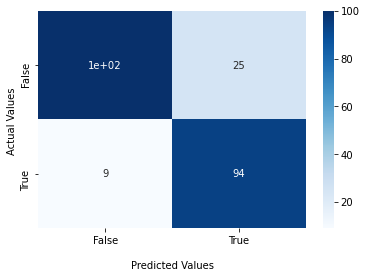

In [12]:
# Import matplotlib and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the confusion matrix as a heatmap
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85       125
           1       0.79      0.91      0.85       103

    accuracy                           0.85       228
   macro avg       0.85      0.86      0.85       228
weighted avg       0.86      0.85      0.85       228



# 7. Grid searching and making the model perform better
Our model was pretty good! It was able to yield an accuracy score of 85%.

For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.

Let's see if we can do better. We can perform a grid search of the model parameters to improve the model's ability to predict credit card approvals.

scikit-learn's implementation of logistic regression consists of different hyperparameters but we will grid search over the following two:

tol

C

In [26]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the grid of values for tol and max_iter
tol = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol, C = C)

#  8. Finding the best performing model
 <p>We have defined the grid of hyperparameter values and converted them into a single dictionary format which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>
<p>We will instantiate <code>GridSearchCV()</code> with our earlier <code>logreg</code> model with all the data we have. Instead of passing train and test sets separately, we will supply <code>X</code> (scaled version) and <code>y</code>. We will also instruct <code>GridSearchCV()</code> to perform a cross-validation of five folds.</p>
<p>We'll end the notebook by storing the best-achieved score and the respective best parameters.</p>

In [27]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X_train)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, np.ravel(y_train,order="c"))

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.874381 using {'C': 0.1, 'tol': 0.001}


In [29]:
logreg = LogisticRegression(max_iter = 10000, C= 0.1, tol= 0.001)
logreg.fit(rescaledX_train, np.ravel(y_train,order="c"))
y_pred = logreg.predict(rescaledX_test)
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

Accuracy of logistic regression classifier:  0.8508771929824561
